In [35]:
# Importing the essential libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GroupKFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# reading the dataset
df = pd.read_csv("C:\Machine Learning\DataSets\Life Expectancy Dataset\Life Expectancy Data.csv")

In [37]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [38]:
# describing the dataset
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [39]:
# checking for non null count & datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [41]:
df['Country'].value_counts(normalize=True)

Country
Afghanistan              0.005446
Albania                  0.005446
Algeria                  0.005446
Angola                   0.005446
Antigua and Barbuda      0.005446
                           ...   
Monaco                   0.000340
Marshall Islands         0.000340
Saint Kitts and Nevis    0.000340
San Marino               0.000340
Tuvalu                   0.000340
Name: proportion, Length: 193, dtype: float64

In [42]:
# Dropping the unneccesry columns
drop_cols = ['Country', 'Year']

In [43]:
# Using status column as categorical column 
cat_cols = ['Status'] 

In [44]:
# Encoding categorical column 
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [45]:
# feature engineering creating a new column GDP per capita
df['GDP_per_capita'] = df['GDP'] / (df['Population'] + 1)

In [46]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
imputer = SimpleImputer(strategy='median')
df[num_cols] = imputer.fit_transform(df[num_cols])

In [47]:
print(df.columns.tolist())


['Country', 'Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling', 'Status_Developing', 'GDP_per_capita']


In [48]:
# Preparing a test_train_split
X = df.drop(['Life expectancy '], axis=1)
y = df['Life expectancy ']

In [49]:
#dropping the column not needed in the list
X = X.drop(columns=drop_cols, errors='ignore')

In [50]:
gkf = GroupKFold(n_splits=5)
groups = df['Country'] if 'Country' in df.columns else np.arange(len(df))

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
#Model Training random Forest
rf = RandomForestRegressor(n_estimators=150, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

In [53]:
#Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

In [54]:
# Model Evaluation 
def print_metrics(y_true, y_pred, name=""):
    print(f"{name} R^2:", r2_score(y_true, y_pred))
    print(f"{name} MAE:", mean_absolute_error(y_true, y_pred))
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{name} RMSE:", rmse)
print_metrics(y_test, rf_preds, "Random Forest")
print_metrics(y_test, lr_preds, "Linear Regression")

Random Forest R^2: 0.9675107327819638
Random Forest MAE: 1.1125544217687093
Random Forest RMSE: 1.6780224046407093
Linear Regression R^2: 0.8241677209836049
Linear Regression MAE: 2.8522885476960615
Linear Regression RMSE: 3.9037059773910405


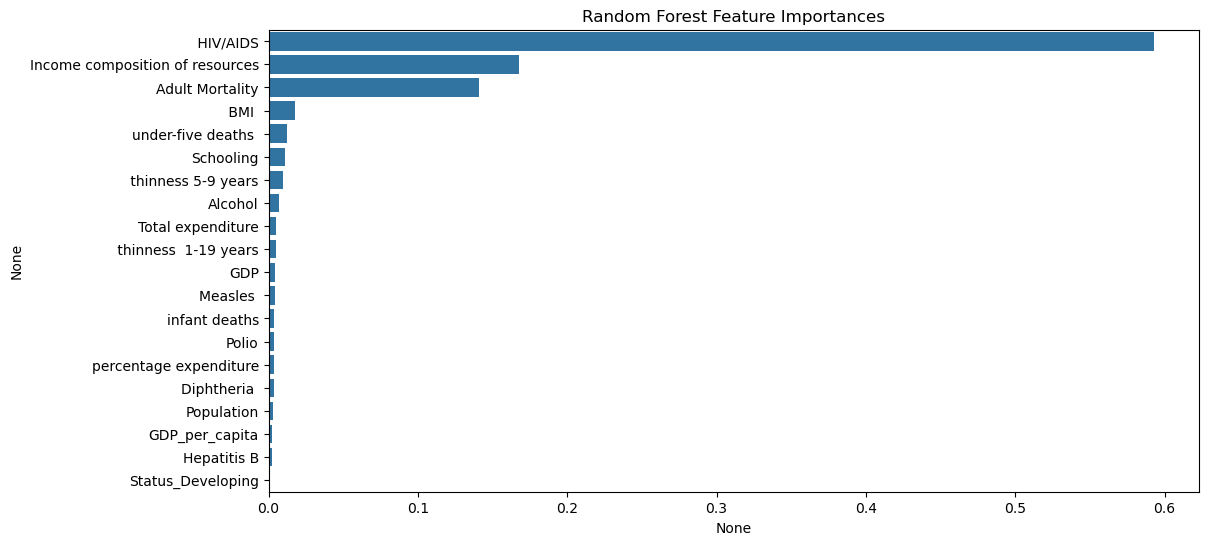

In [55]:
# Feature Importance
# Random forest Importance 
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=feat_importances, y=feat_importances.index)
plt.title("Random Forest Feature Importances")
plt.show()

In [56]:
# Linear Regression Importance 
lr_coefs = pd.Series(lr.coef_, index=X.columns).sort_values(key=abs, ascending=False)
print("Top 10 Linear Regression Coefficients (by strength):\n", lr_coefs[:10])

Top 10 Linear Regression Coefficients (by strength):
 Income composition of resources    6.102574
Status_Developing                 -1.689897
Schooling                          0.635692
 HIV/AIDS                         -0.459233
 thinness  1-19 years             -0.101191
infant deaths                      0.097379
under-five deaths                 -0.072407
Alcohol                            0.057345
GDP_per_capita                     0.042851
Diphtheria                         0.041588
dtype: float64


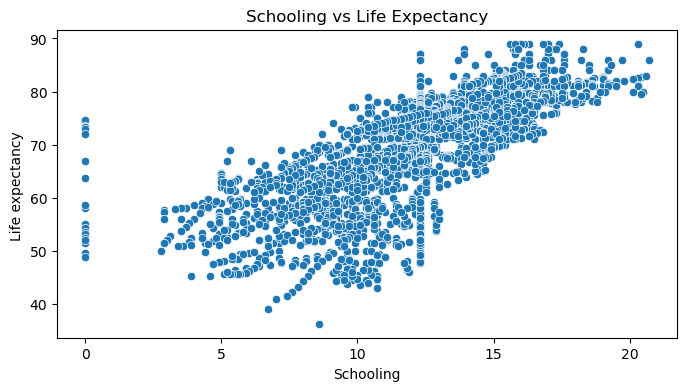

Correlation: 0.713053531093198


In [57]:
# correlation schooling vs life expectancy
plt.figure(figsize=(8,4))
sns.scatterplot(x=df['Schooling'], y=df['Life expectancy '])
plt.title("Schooling vs Life Expectancy")
plt.show()
print('Correlation:', df[['Schooling', 'Life expectancy ']].corr().iloc[0,1])


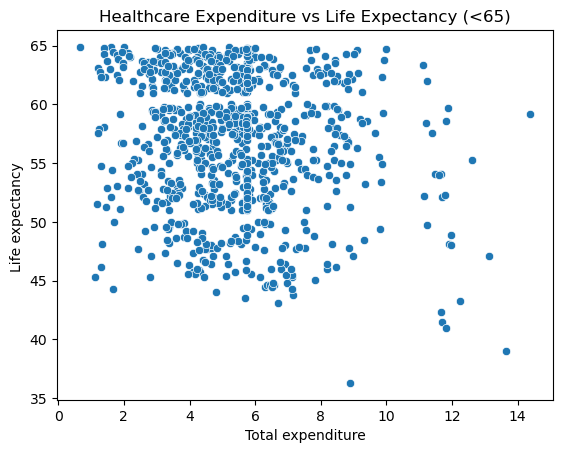

In [58]:
#Impact of Healthcare Expenditure for Low Life Expectancy
low_life = df[df['Life expectancy '] < 65]
sns.scatterplot(x=low_life['Total expenditure'], y=low_life['Life expectancy '])
plt.title("Healthcare Expenditure vs Life Expectancy (<65)")
plt.show()


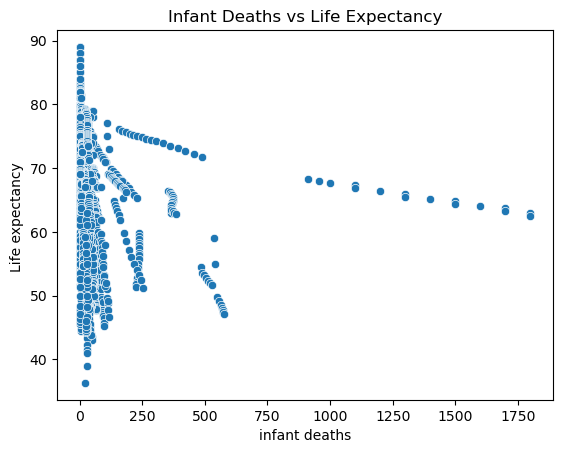

In [59]:
#Impact of Infant Mortality
sns.scatterplot(x=df['infant deaths'], y=df['Life expectancy '])
plt.title("Infant Deaths vs Life Expectancy")
plt.show()


In [61]:
r2_scores = []
mae_scores = []
rmse_scores = []

for fold, (train_idx, test_idx) in enumerate(gkf.split(X, y, groups=groups), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Initialize and train model
    model = RandomForestRegressor(n_estimators=150, random_state=42)
    model.fit(X_train, y_train)

    # Predict and evaluate
    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))

    r2_scores.append(r2)
    mae_scores.append(mae)
    rmse_scores.append(rmse)

    print(f"Fold {fold} — R^2: {r2:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}")

Fold 1 — R^2: 0.8942, MAE: 2.4479, RMSE: 3.6368
Fold 2 — R^2: 0.9152, MAE: 1.9035, RMSE: 2.7237
Fold 3 — R^2: 0.9204, MAE: 1.9998, RMSE: 2.6894
Fold 4 — R^2: 0.9129, MAE: 1.9764, RMSE: 2.7192
Fold 5 — R^2: 0.8683, MAE: 2.0361, RMSE: 2.5891


In [62]:
# Summary of Cross-Validation Performance
print("\nAverage CV Scores:")
print(f"Mean R^2: {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")
print(f"Mean MAE: {np.mean(mae_scores):.4f} ± {np.std(mae_scores):.4f}")
print(f"Mean RMSE: {np.mean(rmse_scores):.4f} ± {np.std(rmse_scores):.4f}")


Average CV Scores:
Mean R^2: 0.9022 ± 0.0191
Mean MAE: 2.0727 ± 0.1925
Mean RMSE: 2.8716 ± 0.3856
